In [ ]:
pip install flexvalue --upgrade

In [3]:
import os

try:
    from google.colab import files
    os.environ['DATABASE_LOCATION'] = '.'
except:
    os.environ['DATABASE_LOCATION'] = '../'
    pass
import pandas as pd
from io import BytesIO

import sqlite3

In [19]:
!flexvalue download-avoided-costs-data-db --year 2020

In [ ]:
!flexvalue download-avoided-costs-data-db --year 2021

In [4]:
db_filepath_2020 = os.path.join(os.environ['DATABASE_LOCATION'], "2020.db")
con_2020 = sqlite3.connect(db_filepath_2020)

db_filepath_2021 = os.path.join(os.environ['DATABASE_LOCATION'], "2021.db")
con_2021 = sqlite3.connect(db_filepath_2021)

## Electricity Analysis

In [5]:
# Enter a climate zone and utility to see the difference in the average avoided costs load shapes
CLIMATE_ZONE = 'CZ12'
UTILITY = 'PGE'
START_YEAR = '2020'
END_YEAR = '2050'

In [6]:
from flexvalue.db import get_filtered_acc_elec, get_filtered_acc_gas

df_elec_2020 = get_filtered_acc_elec('2020', UTILITY,CLIMATE_ZONE, START_YEAR, END_YEAR).sort_values('hour_of_year')
df_elec_2021 = get_filtered_acc_elec('2021', UTILITY,CLIMATE_ZONE, START_YEAR, END_YEAR).sort_values('hour_of_year')

In [7]:
[c for c in df_elec_2020.columns if c not in ['utility', 'climate_zone', 'datetime', 'year', 'month', 'hour_of_day', 'hour_of_year', 'local_pkid_']]

['total',
 'energy',
 'losses',
 'ancillary_services',
 'capacity',
 'transmission',
 'distribution',
 'cap_and_trade',
 'ghg_adder',
 'ghg_rebalancing',
 'methane_leakage',
 'marginal_ghg',
 'ghg_adder_rebalancing']

In [8]:
# Enter a column to check
column = 'total'

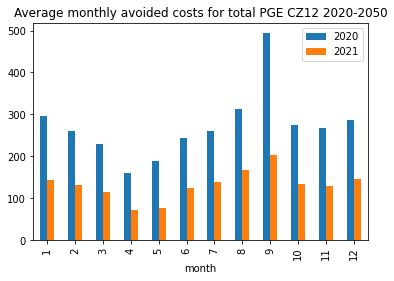

In [10]:
import matplotlib.pyplot as plt

year_range = [year for year in range(int(START_YEAR), int(END_YEAR)+1)]
df_elec_chart_2020 = df_elec_2020[(df_elec_2020['year'].isin(year_range))]
df_elec_chart_2021 = df_elec_2021[df_elec_2021['year'].isin(year_range)]
pd.concat([
    df_elec_chart_2020.groupby('month')[column].mean().rename('2020'),
    df_elec_chart_2021.groupby('month')[column].mean().rename('2021')
], axis=1).plot.bar(title=f'Average monthly avoided costs for {column} {UTILITY} {CLIMATE_ZONE} {START_YEAR}-{END_YEAR}')
pass

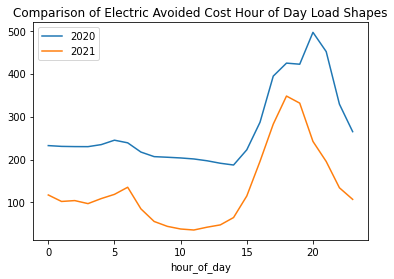

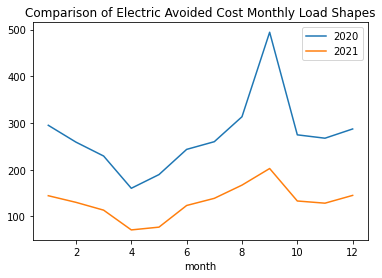

In [11]:
import matplotlib.pyplot as plt
df_elec_2020.groupby('hour_of_day')[column].mean().plot(label='2020')
df_elec_2021.groupby('hour_of_day')[column].mean().plot(label='2021')
plt.legend()
plt.title('Comparison of Electric Avoided Cost Hour of Day Load Shapes')
plt.figure()
df_elec_2020.groupby('month')[column].mean().plot(label='2020')
df_elec_2021.groupby('month')[column].mean().plot(label='2021')
plt.legend()
plt.title('Comparison of Electric Avoided Cost Monthly Load Shapes')
pass

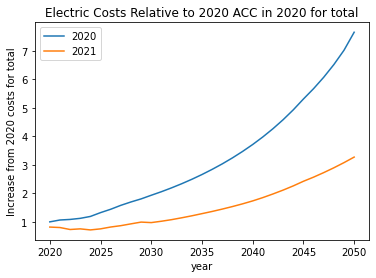

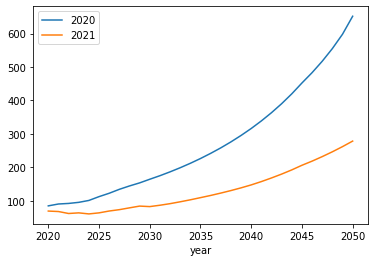

In [14]:
# Levelized
df_elec_2020_yearly = get_filtered_acc_elec('2020', UTILITY,CLIMATE_ZONE, '2020', '2050').groupby('year')[column].mean()
df_elec_2021_yearly = get_filtered_acc_elec('2021', UTILITY,CLIMATE_ZONE, '2020', '2050').groupby('year')[column].mean()           
df_elec_2020_yearly_norm = df_elec_2020_yearly/df_elec_2020_yearly.loc[2020]
df_elec_2021_yearly_norm = df_elec_2021_yearly/df_elec_2020_yearly.loc[2020]
df_elec_2020_yearly_norm.plot(label='2020')                                 
df_elec_2021_yearly_norm.plot(label='2021')
plt.title(f'Electric Costs Relative to 2020 ACC in 2020 for {column}')
plt.ylabel(f'Increase from 2020 costs for {column}')
plt.legend()
pass
plt.figure()
df_elec_2020_yearly.plot(label='2020')
df_elec_2021_yearly.plot(label='2021')
plt.legend()

## Gas Analysis

In [15]:
df_gas_2020 = get_filtered_acc_gas('2020', START_YEAR, END_YEAR)
df_gas_2021 = get_filtered_acc_gas('2021', START_YEAR, END_YEAR)

In [17]:
[c for c in df_gas_2020.columns if c not in ['year', 'month', 'local_pkid_']]

['market', 't_d', 'environment', 'upstream_methane', 'total', 'btm_methane']

In [18]:
# Enter a column to check
column = 'total'

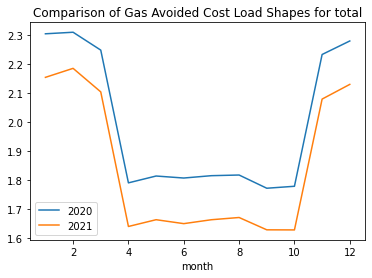

In [19]:
import matplotlib.pyplot as plt
df_gas_2020.groupby('month')[column].mean().plot(label='2020')
df_gas_2021.groupby('month')[column].mean().plot(label='2021')
plt.legend()
plt.title(f'Comparison of Gas Avoided Cost Load Shapes for {column}')
pass

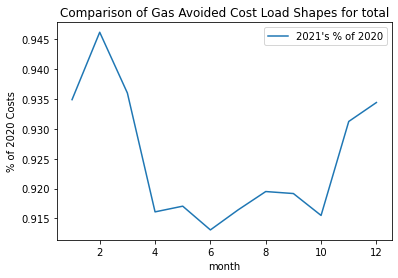

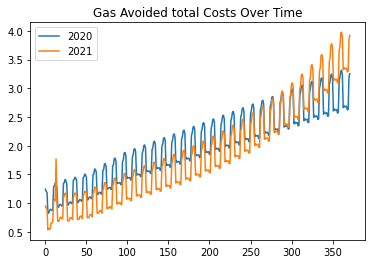

In [20]:
import matplotlib.pyplot as plt
(df_gas_2021.groupby('month')[column].mean()/df_gas_2020.groupby('month')[column].mean()).plot(label="2021's % of 2020")
plt.legend()
plt.title(f'Comparison of Gas Avoided Cost Load Shapes for {column}')
plt.ylabel('% of 2020 Costs')
pass
plt.figure()
df_gas_2020[column].plot(label='2020')
df_gas_2021[column].plot(label='2021')
plt.title(f'Gas Avoided {column} Costs Over Time')
plt.legend()

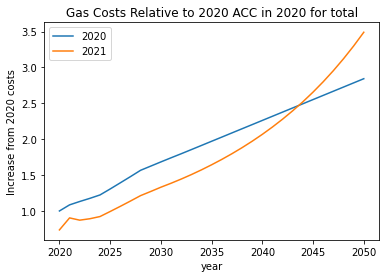

In [21]:
# Levelized
df_gas_2020_yearly = get_filtered_acc_gas('2020','2020', '2050').groupby('year')[column].mean()
df_gas_2021_yearly = get_filtered_acc_gas('2021','2020', '2050').groupby('year')[column].mean() 
df_gas_2020_yearly_norm = df_gas_2020_yearly/df_gas_2020_yearly.loc[2020]
df_gas_2021_yearly_norm = df_gas_2021_yearly/df_gas_2020_yearly.loc[2020]
df_gas_2020_yearly_norm.plot(label='2020')
df_gas_2021_yearly_norm.plot(label='2021')
plt.title(f'Gas Costs Relative to 2020 ACC in 2020 for {column}')
plt.ylabel('Increase from 2020 costs')
plt.legend()
pass

## FLEXvalue run using example deer load shapes

In [22]:
# Running with the ids that are associated with DEER load shapes
from flexvalue.examples import get_example_user_inputs_deer
from flexvalue import FlexValueRun

In [23]:
user_inputs_deer = get_example_user_inputs_deer(database_year='2020')

In [24]:
flx_run_2020 = FlexValueRun(database_year='2020')
outputs_table_deer_2020, outputs_table_totals_deer_2020, electric_benefits_deer_2020, gas_benefits_deer_2020 = flx_run_2020.get_results(user_inputs=user_inputs_deer)
outputs_table_deer_2020

,ID,load_shape,start_year,start_quarter,utility,climate_zone,units,eul,ntg,discount_rate,...,TRC (and PAC) Total Benefits ($),TRC Costs ($),PAC Costs ($),Electricity First Year Net Savings (MWh),Electricity Lifecycle Net Savings (MWh),Gas First Year Net Savings (Therms),Gas Lifecycle Net Savings (Therms),Electricity Lifecycle GHG Savings (Tons),Gas Lifecycle GHG Savings (Tons),Total Lifecycle GHG Savings (Tons)
0,deer_id_0,RES_HVAC_EFF_HP,2020,1,PGE,CZ3A,1.0,9,0.95,0.0766,...,616340.19,12011.48,12943.63,949.916,8549.244,95.0,855.0,2340.477,5.13,2345.607
1,deer_id_1,NONRES_HVAC_SPLIT_PACKAGE_AC,2020,2,PGE,CZ3A,1.0,9,0.95,0.0766,...,1356587.94,24022.96,25887.26,1900.000,17100.004,190.0,1710.0,4407.368,10.26,4417.628
2,deer_id_2,RES_HVAC_EFF_AC,2020,3,PGE,CZ3A,1.0,9,0.95,0.0766,...,2948037.12,36034.44,38830.89,2849.927,25649.342,285.0,2565.0,7980.881,15.39,7996.271
3,deer_id_3,NONRES_HVAC_CHILLERS,2020,4,PGE,CZ3A,1.0,9,0.95,0.0766,...,2775395.29,48045.92,51774.52,3800.023,34200.210,380.0,3420.0,8908.039,20.52,8928.559
4,deer_id_4,RES_BLDGSHELL_INS,2020,1,PGE,CZ3A,1.0,9,0.95,0.0766,...,3620086.00,60057.40,64718.15,4749.846,42748.616,475.0,4275.0,12004.264,25.65,12029.914


In [25]:
flx_run_2021 = FlexValueRun(database_year='2021')
outputs_table_deer_2021, outputs_table_totals_deer_2021, electric_benefits_deer_2021, gas_benefits_deer_2021 = flx_run_2021.get_results(user_inputs=user_inputs_deer)
outputs_table_deer_2021

,ID,load_shape,start_year,start_quarter,utility,climate_zone,units,eul,ntg,discount_rate,...,TRC (and PAC) Total Benefits ($),TRC Costs ($),PAC Costs ($),Electricity First Year Net Savings (MWh),Electricity Lifecycle Net Savings (MWh),Gas First Year Net Savings (Therms),Gas Lifecycle Net Savings (Therms),Electricity Lifecycle GHG Savings (Tons),Gas Lifecycle GHG Savings (Tons),Total Lifecycle GHG Savings (Tons)
0,deer_id_0,RES_HVAC_EFF_HP,2020,1,PGE,CZ3A,1.0,9,0.95,0.0766,...,401760.82,12011.48,12943.63,949.916,8549.244,95.0,855.0,1792.783,5.13,1797.913
1,deer_id_1,NONRES_HVAC_SPLIT_PACKAGE_AC,2020,2,PGE,CZ3A,1.0,9,0.95,0.0766,...,903920.94,24022.96,25887.26,1900.000,17100.004,190.0,1710.0,3201.600,10.26,3211.860
2,deer_id_2,RES_HVAC_EFF_AC,2020,3,PGE,CZ3A,1.0,9,0.95,0.0766,...,2099780.98,36034.44,38830.89,2849.927,25649.342,285.0,2565.0,7593.525,15.39,7608.915
3,deer_id_3,NONRES_HVAC_CHILLERS,2020,4,PGE,CZ3A,1.0,9,0.95,0.0766,...,1777912.39,48045.92,51774.52,3800.023,34200.210,380.0,3420.0,5943.435,20.52,5963.955
4,deer_id_4,RES_BLDGSHELL_INS,2020,1,PGE,CZ3A,1.0,9,0.95,0.0766,...,2422071.43,60057.40,64718.15,4749.846,42748.616,475.0,4275.0,9738.103,25.65,9763.753


In [26]:
outputs_table_totals_deer_2020.round(2)

TRC                                               62.81
PAC                                               58.29
TRC (and PAC) Electric Benefits ($)         11305101.69
TRC (and PAC) Gas Benefits ($)                 11344.87
TRC (and PAC) Total Benefits ($)            11316446.54
TRC Costs ($)                                 180172.20
PAC Costs ($)                                 194154.45
Electricity First Year Net Savings (MWh)       14249.71
Electricity Lifecycle Net Savings (MWh)       128247.42
Gas First Year Net Savings (Therms)             1425.00
Gas Lifecycle Net Savings (Therms)             12825.00
Electricity Lifecycle GHG Savings (Tons)       35641.03
Gas Lifecycle GHG Savings (Tons)                  76.95
Total Lifecycle GHG Savings (Tons)             35717.98
dtype: float64

In [27]:
outputs_table_totals_deer_2021.round(2)

TRC                                              42.21
PAC                                              39.17
TRC (and PAC) Electric Benefits ($)         7596685.36
TRC (and PAC) Gas Benefits ($)                 8761.19
TRC (and PAC) Total Benefits ($)            7605446.56
TRC Costs ($)                                180172.20
PAC Costs ($)                                194154.45
Electricity First Year Net Savings (MWh)      14249.71
Electricity Lifecycle Net Savings (MWh)      128247.42
Gas First Year Net Savings (Therms)            1425.00
Gas Lifecycle Net Savings (Therms)            12825.00
Electricity Lifecycle GHG Savings (Tons)      28269.45
Gas Lifecycle GHG Savings (Tons)                 76.95
Total Lifecycle GHG Savings (Tons)            28346.40
dtype: float64